In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vdf = pd.read_csv("..\Data\sa2_votes.csv")

In [3]:
# Get Census data for Selected Stats
cdf = pd.read_csv("..\Data\census_religious_affimiliation.csv")

In [4]:
df = pd.merge(vdf, cdf, left_on = "SA2_MAIN16", right_on = "sa2_maincode_2016")

In [5]:
df["Preferred Party"] = np.where(df["liberal/national coalition votes"] / df["totalvotes"] > 0.5, "Liberal", "ALP")

In [6]:
df.head()

,Unnamed: 0,SA2_MAIN16,STE_NAME16,liberal/national coalition votes,australian labor party votes,totalvotes,sa2_maincode_2016,buddhism_p,christianity_anglican_p,christianity_baptist_p,...,christianity_catholic_percent,christianity_eastrn_orthdox_percent,christianity_uniting_church_percent,christianity_tot_percent,hinduism_percent,islam_percent,judaism_percent,other_religions_percent,no_religion_percent,Preferred Party
0,0,101021007,New South Wales,655,850,1505,101021007,34,731,11,...,0.212035,0.005424,0.028151,0.485279,0.000000,0.000000,0.000000,0.005424,0.352531,ALP
1,1,101021008,New South Wales,600,937,1537,101021008,80,1467,56,...,0.305929,0.044501,0.029587,0.642537,0.006548,0.006548,0.000364,0.007518,0.245423,ALP
2,2,101021009,New South Wales,7954,9937,17891,101021009,135,1480,81,...,0.243866,0.038923,0.020845,0.521859,0.030529,0.024073,0.000922,0.020568,0.284818,ALP
3,3,101021010,New South Wales,756,1040,1796,101021010,50,625,36,...,0.250104,0.022984,0.022148,0.524655,0.031968,0.038863,0.001672,0.026327,0.274342,ALP
4,4,101021011,New South Wales,3023,3052,6075,101021011,95,2954,178,...,0.252626,0.010445,0.025670,0.536115,0.003010,0.002242,0.000236,0.005842,0.324737,ALP


In [7]:
pdf = df[["STE_NAME16", "Preferred Party", "christianity_tot_percent"]]
pdf = pdf.loc[pdf["STE_NAME16"] != "Other Territories",]
pdf = pdf.sort_values(by = ["STE_NAME16", "Preferred Party"], ascending = True)

In [8]:
pdf.head()

,STE_NAME16,Preferred Party,christianity_tot_percent
2001,Australian Capital Territory,ALP,0.340995
2002,Australian Capital Territory,ALP,0.286465
2003,Australian Capital Territory,ALP,0.354438
2004,Australian Capital Territory,ALP,0.497147
2005,Australian Capital Territory,ALP,0.501783


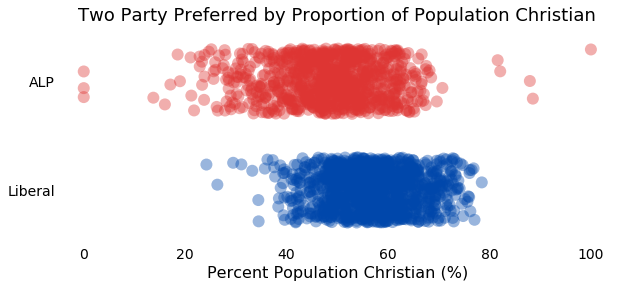

In [9]:
colours = [u"#DE3533", u"#0047AB"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,4))

parties = pdf["Preferred Party"].values
christians = pdf["christianity_tot_percent"].values*100
state = pdf["STE_NAME16"].values

sns.stripplot(christians, parties, jitter = 0.3, size = 12, edgecolor = 'none', alpha = 0.4, palette = colours)
#axes.plot(df.groupby("Preferred Party").median()["christianity_tot_percent"]*100, "_k", ms = 80)

# Add Title
axes.set_title("Two Party Preferred by Proportion of Population Christian", fontsize = 18, ha = "center")

# Set label axis
axes.set_xlabel("Percent Population Christian (%)", fontsize = 16)

# Remove tick marks
axes.tick_params(axis = "x", length = 0, labelsize = 14)
axes.tick_params(axis = "y", length = 0, labelsize = 14)

#Remove spines
axes.spines["right"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)

In [14]:
fig.savefig("tpp_christians.png", dpi = 300, bbox_inches = "tight")

In [38]:
df1 = df[["Preferred Party","christianity_anglican_percent"]]
df1.columns = ["Preferred Party", "Percent"]
df1["denomination"] = "Anglican"

df2 = df[["Preferred Party","christianity_baptist_percent"]]
df2.columns = ["Preferred Party", "Percent"]
df2["denomination"] = "Baptist"

df3 = df[["Preferred Party","christianity_catholic_percent"]]
df3.columns = ["Preferred Party", "Percent"]
df3["denomination"] = "Catholic"

df4 = df[["Preferred Party","christianity_eastrn_orthdox_percent"]]
df4.columns = ["Preferred Party", "Percent"]
df4["denomination"] = "Orthodox"

df5 = df[["Preferred Party","christianity_uniting_church_percent"]]
df5.columns = ["Preferred Party", "Percent"]
df5["denomination"] = "Uniting"

frames = [df1, df2, df3, df4, df5]
ddf = pd.concat(frames)

C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:11: SettingWit

In [42]:
ddf = ddf.groupby(["Preferred Party", "denomination"]).median()
ddf.reset_index(inplace = True)
ddf.head(10)

,Preferred Party,denomination,Percent
0,ALP,Anglican,0.104934
1,ALP,Baptist,0.011263
2,ALP,Catholic,0.214574
3,ALP,Orthodox,0.014043
4,ALP,Uniting,0.026109
5,Liberal,Anglican,0.165786
6,Liberal,Baptist,0.013563
7,Liberal,Catholic,0.215009
8,Liberal,Orthodox,0.004237
9,Liberal,Uniting,0.044155


In [64]:
fdf = ddf.loc[ddf["Preferred Party"] == "ALP",]
l = ddf.loc[ddf["Preferred Party"] == "Liberal",].set_index("denomination")["Percent"].to_dict()
fdf["Liberal Percent"] = fdf["denomination"].map(l)
fdf["Pop Diff Percent"] = round(((fdf["Liberal Percent"] / fdf["Percent"]) - 1) * 100,2)
fdf["Pop Diff"] = round((fdf["Liberal Percent"] - fdf["Percent"]) * 100, 2)
fdf.head()

C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\will.kent\AppData\Local\Continuum\anaconda3\envs\py37\lib\site-packages\ipykernel

,Preferred Party,denomination,Percent,Liberal Percent,Pop Diff Percent,Pop Diff
0,ALP,Anglican,0.104934,0.165786,57.99,6.09
1,ALP,Baptist,0.011263,0.013563,20.42,0.23
2,ALP,Catholic,0.214574,0.215009,0.20,0.04
3,ALP,Orthodox,0.014043,0.004237,-69.83,-0.98
4,ALP,Uniting,0.026109,0.044155,69.11,1.80


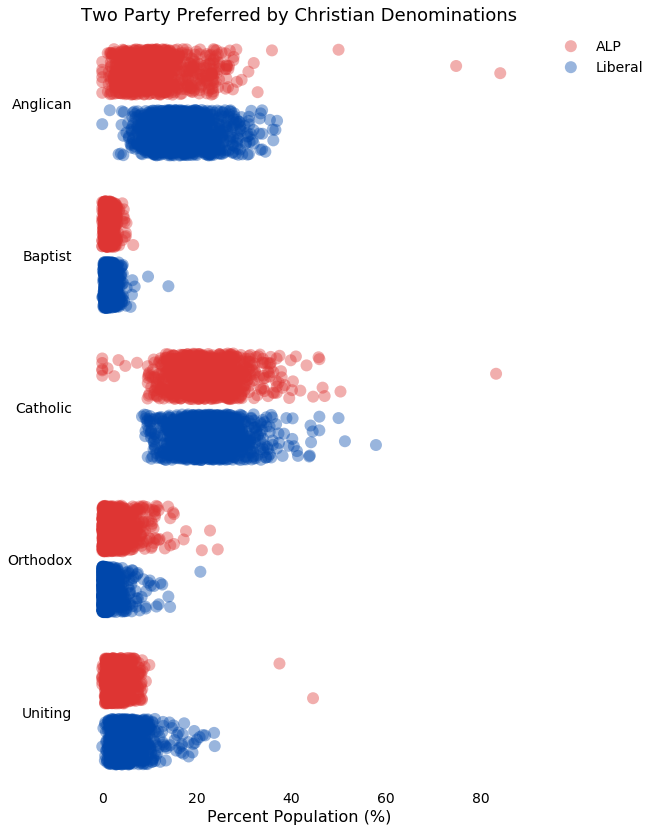

In [29]:
colours = [u"#DE3533", u"#0047AB"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,14))

parties = ddf["Preferred Party"].values
christians = ddf["Percent"].values*100
denomination = ddf["denomination"].values

sns.stripplot(christians, denomination, hue = parties
              ,jitter = 0.3, size = 12, edgecolor = 'none'
              ,alpha = 0.4, palette = colours, dodge = True)

# Add Title
axes.set_title("Two Party Preferred by Christian Denominations", fontsize = 18, ha = "center")

# Set label axis
axes.set_xlabel("Percent Population (%)", fontsize = 16)

# Remove tick marks
axes.tick_params(axis = "x", length = 0, labelsize = 14)
axes.tick_params(axis = "y", length = 0, labelsize = 14)

#Remove spines
axes.spines["right"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)

box = axes.get_position()
axes.set_position([box.x0, box.y0, box.width * 1, box.height])
axes.legend(("ALP", "Liberal"), fontsize = 14, frameon = False, bbox_to_anchor = (1.3, 1))

In [ ]:
fig.savefig("tpp_christians_by_state.png", dpi = 300, bbox_inches = "tight")

Text(0, 10, 'Liberal')

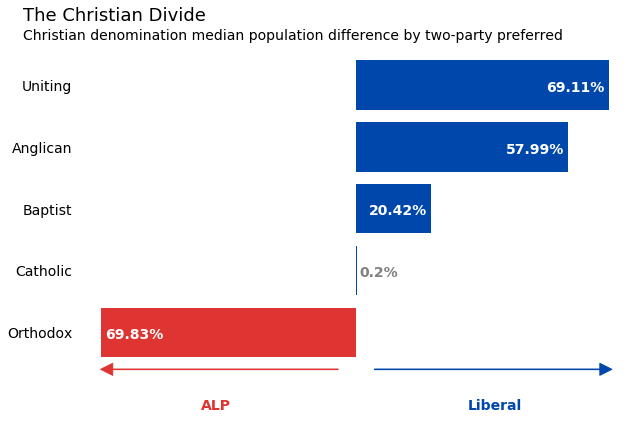

In [245]:
colours = [u"#0047AB", u"#0047AB",u"#0047AB", u"#0047AB", u"#DE3533"]
text_colour = "white"
alt_text_colour = "grey"
width = 0.4

fdf = fdf.sort_values("Pop Diff Percent", ascending = False)

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,6))

pop_diff = fdf["Pop Diff Percent"].values
denominations = fdf["denomination"].values
y_pos = np.arange(len(denomination))

# Create horizontal bar chart
axes.barh(denominations, pop_diff, align = "center", color = colours)

# Add text values to bars
for i, v in enumerate(pop_diff):
    if v < 0:
        axes.text(v + 9, i + .1, str(-1*v) + "%", color = text_colour, ha = "center", fontweight="bold", fontsize = 14)
    elif v < 10:
        axes.text(v + 6, i + .1, str(v) + "%", color = alt_text_colour, ha = "center", fontweight="bold", fontsize = 14)
    else:
        axes.text(v + -9, i + .1, str(v) + "%", color = text_colour, ha = "center", fontweight="bold", fontsize = 14)

# Add Title
axes.set_title("Christian denomination median population difference by two-party preferred"
               ,fontsize = 14
               ,ma = "left"
               ,ha = "right"
               ,position = (0.872,1))
fig.suptitle("The Christian Divide"
               ,fontsize = 18
               ,ma = "left"
               ,ha = "right"
               ,position = (0.305,0.97))

# Add labels to y axis
axes.set_yticklabels(denominations)
axes.invert_yaxis()

# Remove tick marks and x axis 
axes.tick_params(axis = "both", length = 0, labelsize = 14)
axes.get_xaxis().set_visible(False)

 # Remove spines
axes.spines["top"].set_visible(False)
axes.spines["bottom"].set_visible(False)
axes.spines["left"].set_visible(False)
axes.spines["right"].set_visible(False)

axes.annotate("", xy = (70,4.6), xytext= (5,4.6), arrowprops = dict(width = 0.6, color = "#0047AB"))
axes.annotate("", xy = (-70,4.6), xytext= (-5,4.6), arrowprops = dict(width = 0.6, color = "#DE3533"))

# Now let's add your additional information
axes.annotate('ALP',
            xy=(0.25, 0), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='center', va='bottom', color = "#DE3533", fontweight = "bold")
axes.annotate('Liberal',
            xy=(0.75, 0), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='center', va='bottom', color = "#0047AB", fontweight = "bold")